# Complex seismic anisotropy and mantle dynamics beneath Turkey
# A.A. Lemnifi et al., 2017 

In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
from obspy.geodetics.base import gps2dist_azimuth,kilometer2degrees
from obspy.taup import TauPyModel
from obspy.signal.rotate import rotate_ne_rt
from matplotlib.ticker import MultipleLocator
from obspy.signal.filter import envelope
from obspy import read, read_inventory, Trace
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
model = TauPyModel(model="prem")
client = Client("IRIS")
plt.rcParams['font.sans-serif']='Times New Roman'

In [211]:
preflit= [0.001,0.005,9,10]
freqmin=0.04
freqmax=0.5

In [219]:
# starttime = UTCDateTime("2011-04-07")
# endtime = UTCDateTime("2011-04-08")
starttime = UTCDateTime(year=2006, julday=317)
endtime = UTCDateTime(year=2006, julday=318)
cat = client.get_events(starttime=starttime, endtime=endtime,minmagnitude = 5.5)
print(cat)

3 Event(s) in Catalog:
2006-11-13T16:12:31.870000Z |  -6.418, +151.186 | 6.2 MW
2006-11-13T11:56:39.530000Z | -17.863, -178.434 | 5.5 MW
2006-11-13T01:26:36.370000Z | -26.161,  -63.292 | 6.8 MW


In [220]:
eq_time = cat[0].origins[0].time
print(eq_time)
eq_lon = cat[0].origins[0].longitude
eq_lat = cat[0].origins[0].latitude
depth  = cat[0].origins[0].depth/1000
mag    = cat[0].magnitudes[0].mag
mag_type = cat[0].magnitudes[0].magnitude_type
inv = client.get_stations(network="YL", station='ALIC', channel="*",
                            starttime=eq_time,endtime=eq_time+30*60)

st_lat = inv[0][0].latitude
st_lon = inv[0][0].longitude

dist,azi,baz = gps2dist_azimuth(eq_lat,eq_lon,st_lat,st_lon)
dist = dist/1000
deg = kilometer2degrees(dist)

2006-11-13T16:12:31.870000Z


In [221]:
ori_st = client.get_waveforms('YL', 'ALIC','*','BH*',eq_time,eq_time+30*60,attach_response=True)
st = ori_st.copy()
st.merge(fill_value=0)
st.remove_response(pre_filt = preflit, output="DISP")
st.detrend('linear')
st.detrend('demean')
st.taper(0.05,type='cosine')
st.filter('bandpass',freqmin=freqmin,freqmax=freqmax,corners=4,zerophase=True)
dt = 1 / st[0].stats.sampling_rate
BH2 = st.select(channel='BHE')[0].data
BH1 = st.select(channel='BHN')[0].data
BHR,BHT = rotate_ne_rt(BH1,BH2,baz)

In [224]:
arrivals = model.get_travel_times(source_depth_in_km=depth,distance_in_degree=deg,phase_list=['SKS','SKKS','SKKKS'])
arr_SKS = arrivals[0].time
arr_SKKS = arrivals[1].time
arr_SKKKS = arrivals[2].time

In [225]:
print(arrivals)

5 arrivals
	SKS phase arrival at 1524.401 seconds
	SKKS phase arrival at 1592.681 seconds
	SKKKS phase arrival at 1601.408 seconds
	SKKS phase arrival at 2200.190 seconds
	SKKKS phase arrival at 2392.133 seconds


Text(0.5, 0.98, '2006-11-13T16:12:31.870000Z\n lat:-6.4175 lon:151.1863 dep:25.7km  6.2MW  bp:0.04-0.5Hz')

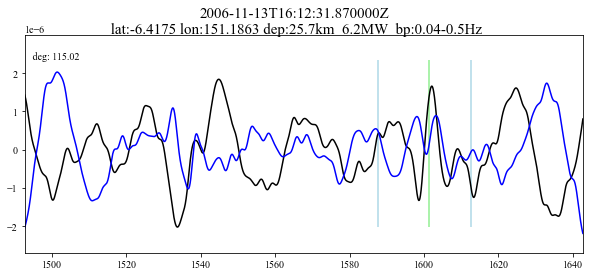

In [226]:
plt.figure(1,figsize=(10,4))
times = st[0].times(reftime=eq_time)

plt.xlim(arr_SKKS-100,arr_SKKS+50)
plt.vlines(x = arr_SKKKS,ymin = min(BHR),ymax=max(BHR),color='lightgreen')

plt.vlines(x = arr_SKKS-5,ymin = min(BHR),ymax=max(BHR),color='lightblue')
plt.vlines(x = arr_SKKS+20,ymin = min(BHR),ymax=max(BHR),color='lightblue')
# plt.vlines(x = arr_SKS+20,ymin = min(BHR),ymax=max(BHR),color='lightpink')
# plt.vlines(x = arr_SKS-5,ymin = min(BHR),ymax=max(BHR),color='lightpink')
plt.text(arr_SKKS-100,max(BHR),f'   deg: {round(deg,2)}')
plt.plot(times,BHR,'k')
plt.plot(times,BHT,'b')
plt.suptitle(f'{eq_time}\n lat:{eq_lat} lon:{eq_lon} dep:{depth}km  {mag}{mag_type}  bp:{freqmin}-{freqmax}Hz', 
                             fontsize=15)

In [143]:
client.get_waveforms('IU', 'GNI','*','BH*',eq_time,eq_time+30*60,attach_response=True)

3 Trace(s) in Stream:
IU.GNI.00.BHE | 2010-07-12T00:11:20.060645Z - 2010-07-12T00:41:20.010645Z | 20.0 Hz, 36000 samples
IU.GNI.00.BHN | 2010-07-12T00:11:20.060645Z - 2010-07-12T00:41:20.010645Z | 20.0 Hz, 36000 samples
IU.GNI.00.BHZ | 2010-07-12T00:11:20.060645Z - 2010-07-12T00:41:20.010645Z | 20.0 Hz, 36000 samples

In [172]:
inv = client.get_stations(network="YL", station='ALIC', channel="*")

In [181]:
starttime = UTCDateTime(year=2007, julday=350)

In [195]:
arr_SKKKS

1993.0394564159969